### BTS Member Classification

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### Preprocessing

In [2]:
img = cv2.imread('./test_images/test1.jpg')
img.shape

(1018, 1526, 3)

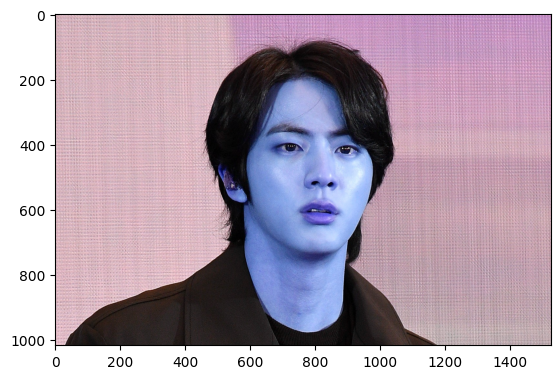

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1018, 1526)

In [5]:
gray

array([[186, 146, 180, ..., 159, 166, 164],
       [164, 137, 173, ..., 160, 169, 171],
       [177, 133, 134, ..., 164, 176, 184],
       ...,
       [214, 199, 207, ..., 133, 120, 133],
       [204, 196, 193, ..., 162, 166, 178],
       [195, 192, 188, ..., 178, 176, 182]], dtype=uint8)

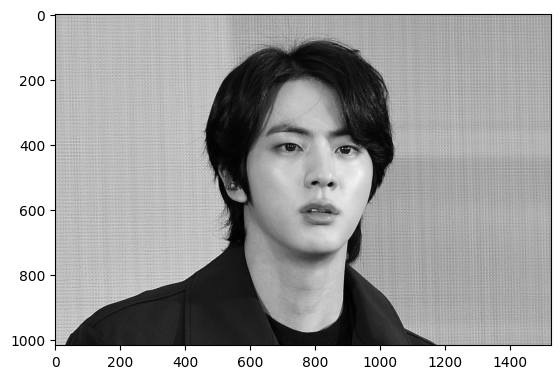

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haar-cascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haar-cascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[552, 223, 486, 486]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(552, 223, 486, 486)

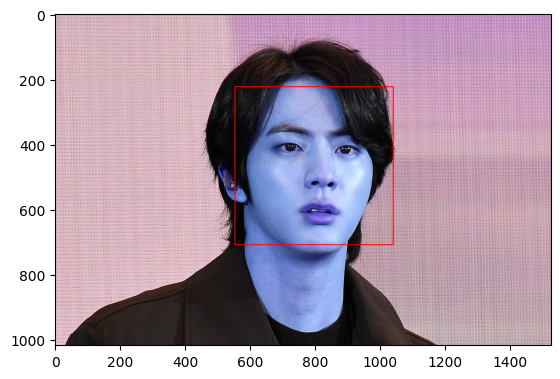

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

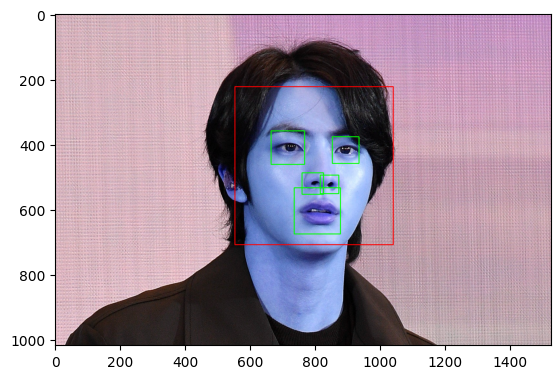

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### Cropping the facial region of the image

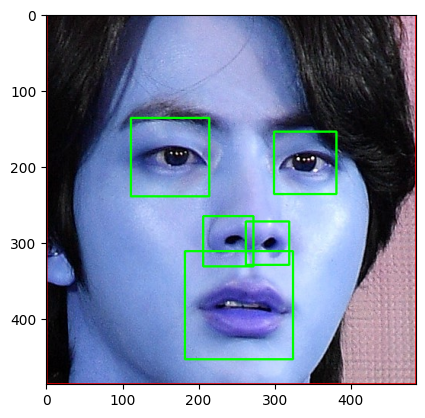

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(486, 486, 3)

### Use wavelet transform as a feature for traning our model

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

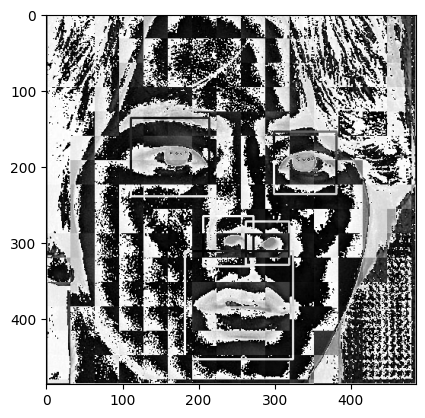

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

###  Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Extract region of interest (ROI) for face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Perform eye detection on the ROI
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Check if at least two eyes are detected
        if len(eyes) >= 2:
            return roi_color
        
    # Return None if no suitable face with two eyes is found
    return None

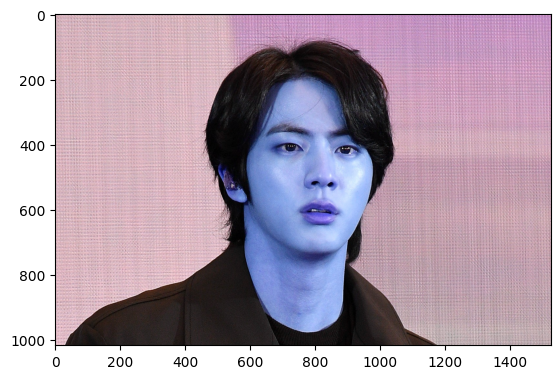

In [16]:
original_image = cv2.imread('./test_images/test1.jpg')
plt.imshow(original_image)

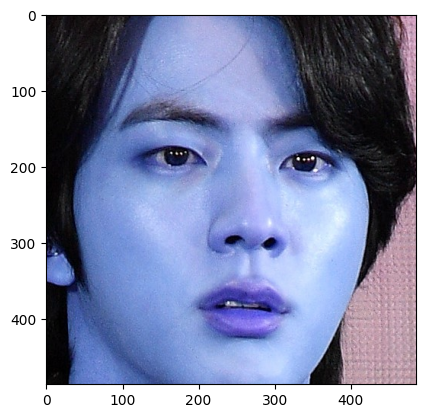

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/test1.jpg')
plt.imshow(cropped_image)

In [18]:
path_to_data = "./new_dataset/"
path_to_cr_data = "./new_dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./new_dataset/BTS J-Hope',
 './new_dataset/BTS Jimin',
 './new_dataset/BTS Jin',
 './new_dataset/BTS Jungkook',
 './new_dataset/BTS RM',
 './new_dataset/BTS Suga',
 './new_dataset/BTS V',
 './new_dataset/cropped']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./new_dataset/cropped/BTS J-Hope
Error: Unable to load image at ./new_dataset/BTS J-Hope\BTS J-Hope_5.jpg
Error: Unable to load image at ./new_dataset/BTS J-Hope\BTS J-Hope_57.jpg
Error: Unable to load image at ./new_dataset/BTS J-Hope\BTS J-Hope_63.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_100.jpg
Generating cropped images in folder:  ./new_dataset/cropped/BTS Jimin
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_106.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_119.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_12.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_139.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_146.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_18.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BTS Jimin_31.jpg
Error: Unable to load image at ./new_dataset/BTS Jimin\BT

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'BTS J-Hope': ['./new_dataset/cropped/BTS J-Hope\\BTS J-Hope1.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope10.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope11.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope12.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope13.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope14.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope15.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope16.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope17.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope18.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope19.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope2.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope20.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope21.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope22.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope23.png',
  './new_dataset/cropped/BTS J-Hope\\BTS J-Hope24.png',
  './new_dataset/cropped/BTS J-Hope\

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'BTS J-Hope': 0,
 'BTS Jimin': 1,
 'BTS Jin': 2,
 'BTS Jungkook': 3,
 'BTS RM': 4,
 'BTS Suga': 5,
 'BTS V': 6}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[226],
       [241],
       [253],
       ...,
       [ 25],
       [  5],
       [  5]], dtype=uint8)

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(407, 4096)

### Data cleaning process is done. Now we are ready to train our model

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8292682926829268

In [31]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.78      0.88      0.82         8
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         2
           4       0.75      1.00      0.86         9
           5       1.00      0.50      0.67        10
           6       0.50      0.50      0.50         2

    accuracy                           0.83        41
   macro avg       0.85      0.84      0.83        41
weighted avg       0.86      0.83      0.82        41



In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    },
    'k_nearest_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [3, 5, 7],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
            'decisiontreeclassifier__min_samples_split': [2, 5, 10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.754165,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.683265,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.776046,{'logisticregression__C': 1}
3,k_nearest_neighbors,0.734950,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."
4,naive_bayes,0.502925,{}
5,decision_tree,0.669382,"{'decisiontreeclassifier__max_depth': 15, 'dec..."


In [35]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'k_nearest_neighbors': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier',
                  KNeighborsClassifier(weights='distance'))]),
 'naive_bayes': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gaussiannb', GaussianNB())]),
 'decision_tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=15))])}

In [36]:
best_estimators['svm'].score(X_test,y_test)

0.8292682926829268

In [37]:
best_estimators['random_forest'].score(X_test,y_test)

0.8292682926829268

In [38]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8292682926829268

In [39]:
best_estimators['k_nearest_neighbors'].score(X_test,y_test)

0.8536585365853658

In [40]:
best_estimators['naive_bayes'].score(X_test,y_test)

0.2682926829268293

In [41]:
best_estimators['decision_tree'].score(X_test,y_test)

0.8292682926829268

In [49]:
best_clf = best_estimators['logistic_regression']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 1, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 9, 0, 0],
       [0, 1, 1, 1, 2, 5, 0],
       [0, 1, 0, 0, 0, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

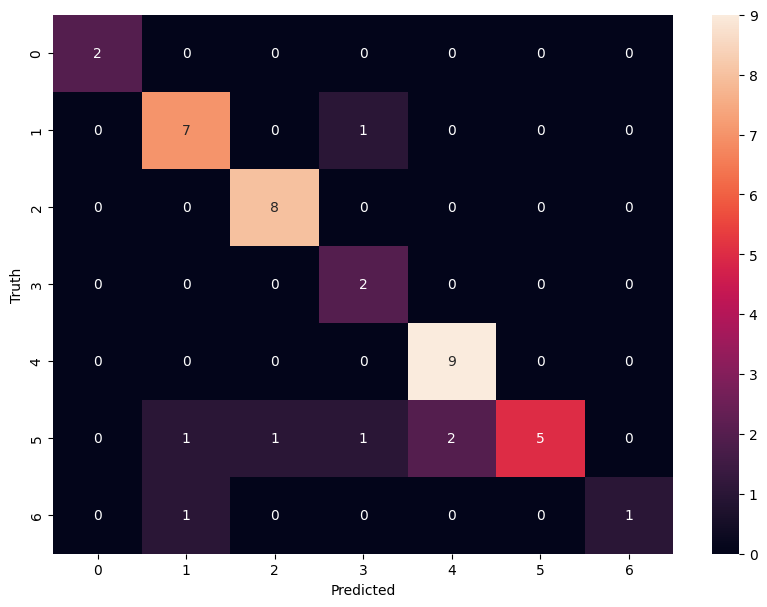

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
class_dict

{'BTS J-Hope': 0,
 'BTS Jimin': 1,
 'BTS Jin': 2,
 'BTS Jungkook': 3,
 'BTS RM': 4,
 'BTS Suga': 5,
 'BTS V': 6}

### Save the training model

In [46]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [47]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))